In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
df=pd.read_csv("Energy Production Dataset.csv")

In [2]:
#%pip install matplotlib seaborn

In [3]:
df.head()

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387


In [4]:
df.columns

Index(['Date', 'Start_Hour', 'End_Hour', 'Source', 'Day_of_Year', 'Day_Name',
       'Month_Name', 'Season', 'Production'],
      dtype='object')

In [5]:
df.shape

(51864, 9)

## Energy Production

This dataset contains information about Wind and solar energy production in France, between 2020 and 2025, aiming to analyze the relationships between different features and the target variable, `Production`.

### Key Features:
- **Period**: Information about the period was collected information about production (`Date`, `Star_Hour`, `End_Hour`,`Day_of_Year`,etc.).
- **Origem of the energy**: Provenience os the energy (`Souce`).

### Summary:
- **Total Features**:  (51.864 combination of numerical and categorical variables).
- **Target Variable**: `Prduction` (MWh).

# Data insights

In [6]:
df.shape

(51864, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         51864 non-null  object
 1   Start_Hour   51864 non-null  int64 
 2   End_Hour     51864 non-null  int64 
 3   Source       51864 non-null  object
 4   Day_of_Year  51864 non-null  int64 
 5   Day_Name     51864 non-null  object
 6   Month_Name   51864 non-null  object
 7   Season       51864 non-null  object
 8   Production   51864 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


# Separate numeric and categorical Columns

In [8]:
num = df.select_dtypes(include="number") 
cat = df.select_dtypes(exclude="number")

In [9]:
num.shape

(51864, 4)

In [10]:
cat.shape

(51864, 5)

In [11]:
num.head()

,Start_Hour,End_Hour,Day_of_Year,Production
0,21,22,334,5281
1,18,19,334,3824
2,16,17,334,3824
3,23,0,334,6120
4,6,7,334,4387


In [12]:
cat

,Date,Source,Day_Name,Month_Name,Season
0,11/30/2025,Wind,Sunday,November,Fall
1,11/30/2025,Wind,Sunday,November,Fall
2,11/30/2025,Wind,Sunday,November,Fall
3,11/30/2025,Wind,Sunday,November,Fall
4,11/30/2025,Wind,Sunday,November,Fall
...,...,...,...,...,...
51859,1/1/2020,Wind,Wednesday,January,Winter
51860,1/1/2020,Wind,Wednesday,January,Winter
51861,1/1/2020,Wind,Wednesday,January,Winter
51862,1/1/2020,Solar,Wednesday,January,Winter


In [13]:
num.describe()

,Start_Hour,End_Hour,Day_of_Year,Production
count,51864.000000,51864.000000,51864.000000,51864.000000
mean,11.500000,11.500000,180.798415,6215.069933
std,6.922253,6.922253,104.291387,3978.364965
min,0.000000,0.000000,1.000000,58.000000
25%,5.750000,5.750000,91.000000,3111.000000
50%,11.500000,11.500000,181.000000,5372.000000
75%,17.250000,17.250000,271.000000,8501.000000
max,23.000000,23.000000,366.000000,23446.000000


In [14]:
round(num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Start_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
End_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Day_of_Year,51864.0,180.80,104.29,1.0,91.00,181.0,271.00,366.0
Production,51864.0,6215.07,3978.36,58.0,3111.00,5372.0,8501.00,23446.0


# There is missing values?

In [15]:
df.isna().sum()

Date           0
Start_Hour     0
End_Hour       0
Source         0
Day_of_Year    0
Day_Name       0
Month_Name     0
Season         0
Production     0
dtype: int64

# There is duplicates values?

In [16]:
num.duplicated().sum()

np.int64(12)

In [17]:
duplicates = df[df.duplicated()]
duplicates

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production


In [18]:
duplicates = df[df.duplicated(keep=False)]
duplicates.sort_values(by=df.columns.tolist())


,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production


In [19]:
df.loc[df.duplicated()].equals(df.loc[df.duplicated()].drop_duplicates())

True

In [26]:
print(type(num))
print(num)


<class 'pandas.core.frame.DataFrame'>
       Start_Hour  End_Hour  Day_of_Year  Production
0              21        22          334        5281
1              18        19          334        3824
2              16        17          334        3824
3              23         0          334        6120
4               6         7          334        4387
...           ...       ...          ...         ...
51859           4         5            1        2708
51860          18        19            1        1077
51861           7         8            1        2077
51862          14        15            1        1783
51863          13        14            1        2179

[51864 rows x 4 columns]


In [28]:
num = df.select_dtypes(include="number").columns.tolist()
print(num)

['Start_Hour', 'End_Hour', 'Day_of_Year', 'Production']


In [29]:
summary = df[num].describe().T
summary["median"] = df[num].median(numeric_only=True)
summary["skew"] = df[num].skew(numeric_only=True)
summary["kurtosis"] = df[num].kurtosis(numeric_only=True)
summary.sort_values("std", ascending=False)


,count,mean,std,min,25%,50%,75%,max,median,skew,kurtosis
Production,51864.0,6215.069933,3978.364965,58.0,3111.00,5372.0,8501.00,23446.0,5372.0,0.928561,0.469162
Day_of_Year,51864.0,180.798415,104.291387,1.0,91.00,181.0,271.00,366.0,181.0,0.009190,-1.188388
Start_Hour,51864.0,11.500000,6.922253,0.0,5.75,11.5,17.25,23.0,11.5,0.000000,-1.204174
End_Hour,51864.0,11.500000,6.922253,0.0,5.75,11.5,17.25,23.0,11.5,0.000000,-1.204174


In [31]:
print(df.columns.tolist())

['Date', 'Start_Hour', 'End_Hour', 'Source', 'Day_of_Year', 'Day_Name', 'Month_Name', 'Season', 'Production']


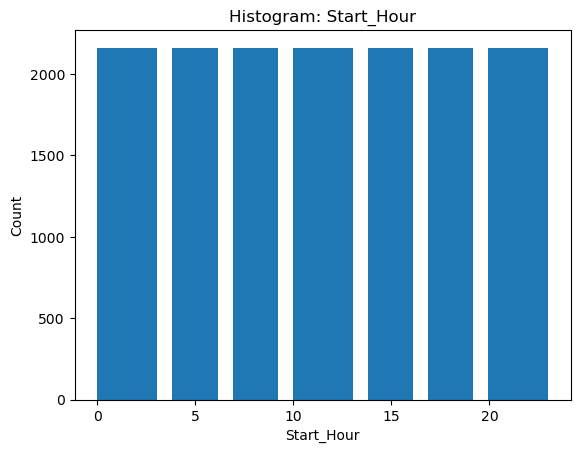

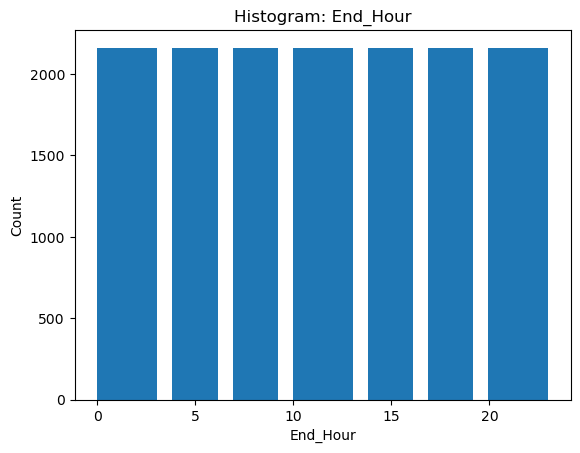

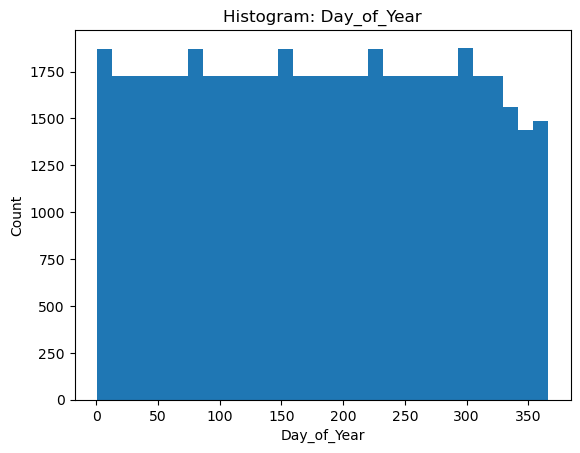

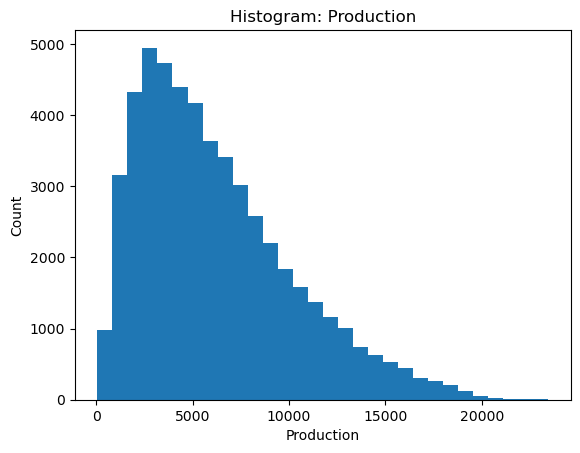

In [32]:
for col in num:
    s = df[col].dropna()
    plt.figure()
    plt.hist(s, bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

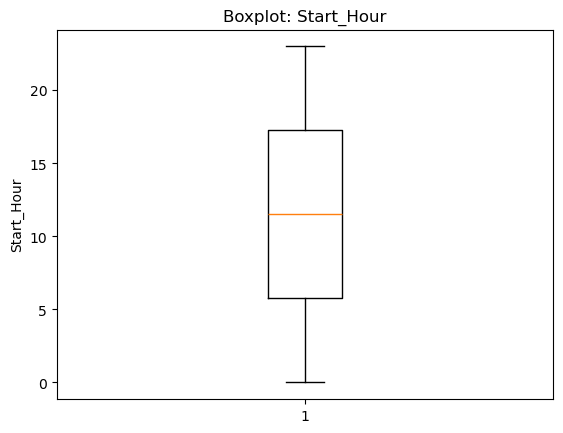

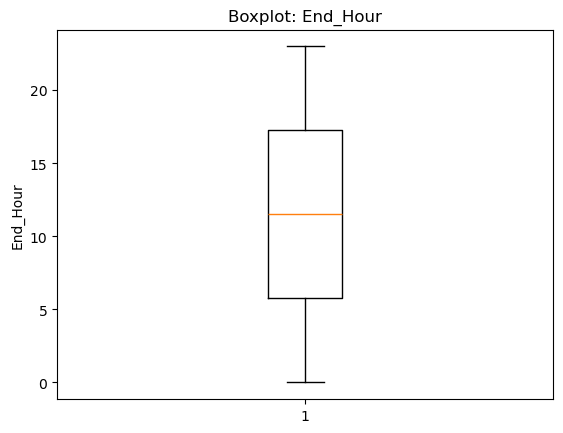

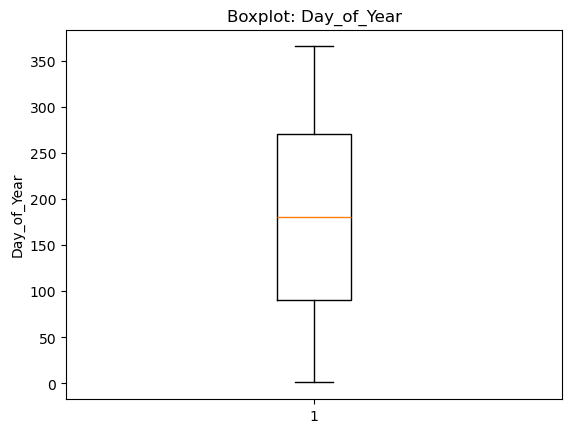

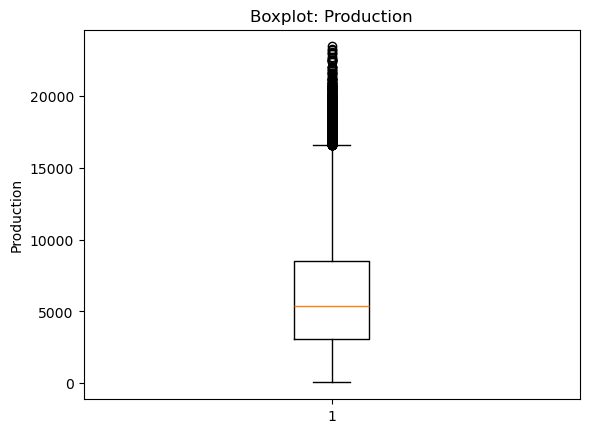

In [34]:
for col in num:
    s = df[col].dropna()
    plt.figure()
    plt.boxplot(s, vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.show()


# NUMERICAL

Start Hour

In [36]:
# Confirm what pandas thinks
df["Start_Hour"].dtype

dtype('int64')

In [37]:
df["Start_Hour"].describe()


count    51864.000000
mean        11.500000
std          6.922253
min          0.000000
25%          5.750000
50%         11.500000
75%         17.250000
max         23.000000
Name: Start_Hour, dtype: float64

min should be ~0 or ~1
max should be ~23 or ~24
Mean/median are not very meaningful for hours, but still useful to detect bias

In [38]:
df["Start_Hour"].isna().sum()

np.int64(0)

In [39]:
hour_freq = df["Start_Hour"].value_counts().sort_index()
hour_freq

Start_Hour
0     2161
1     2161
2     2161
3     2161
4     2161
5     2161
6     2161
7     2161
8     2161
9     2161
10    2161
11    2161
12    2161
13    2161
14    2161
15    2161
16    2161
17    2161
18    2161
19    2161
20    2161
21    2161
22    2161
23    2161
Name: count, dtype: int64

In [40]:
hour_freq_pct = (hour_freq / hour_freq.sum() * 100).round(2)
hour_freq_pct


Start_Hour
0     4.17
1     4.17
2     4.17
3     4.17
4     4.17
5     4.17
6     4.17
7     4.17
8     4.17
9     4.17
10    4.17
11    4.17
12    4.17
13    4.17
14    4.17
15    4.17
16    4.17
17    4.17
18    4.17
19    4.17
20    4.17
21    4.17
22    4.17
23    4.17
Name: count, dtype: float64

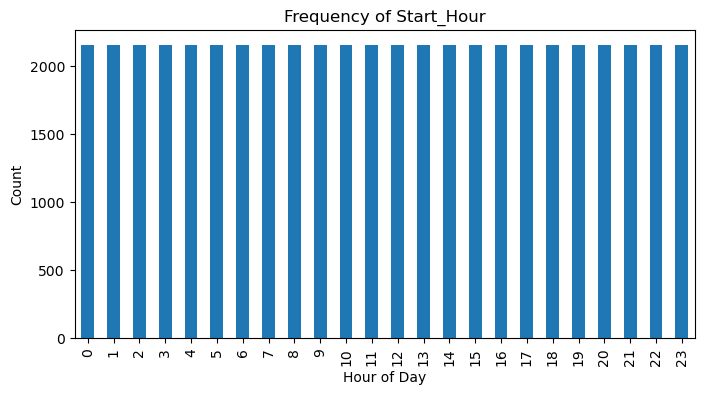

In [41]:
plt.figure(figsize=(8,4))
hour_freq.plot(kind="bar")
plt.title("Frequency of Start_Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

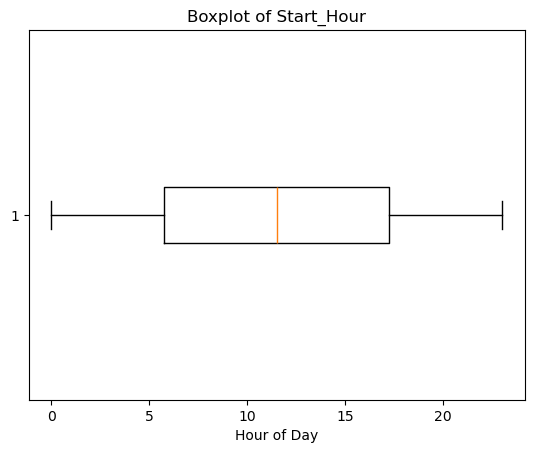

In [42]:
plt.figure()
plt.boxplot(df["Start_Hour"].dropna(), vert=False)
plt.title("Boxplot of Start_Hour")
plt.xlabel("Hour of Day")
plt.show()

The variable Start_Hour represents the hour of the day at which energy production measurements begin. It ranges from X to Y, covering all/most hours of the day. The distribution is not uniform, with higher frequencies observed during [specific hours], indicating a temporal concentration of observations. No invalid hour values were detected. Given its discrete and cyclical nature, Start_Hour is better interpreted as a time-based categorical variable rather than a continuous numerical one.

End_Hour

In [43]:
df["End_Hour"].dtype

dtype('int64')

In [44]:
df["End_Hour"].describe()


count    51864.000000
mean        11.500000
std          6.922253
min          0.000000
25%          5.750000
50%         11.500000
75%         17.250000
max         23.000000
Name: End_Hour, dtype: float64

In [45]:
df["End_Hour"].isna().sum()


np.int64(0)

In [46]:
end_hour_freq = df["End_Hour"].value_counts().sort_index()
end_hour_freq

End_Hour
0     2161
1     2161
2     2161
3     2161
4     2161
5     2161
6     2161
7     2161
8     2161
9     2161
10    2161
11    2161
12    2161
13    2161
14    2161
15    2161
16    2161
17    2161
18    2161
19    2161
20    2161
21    2161
22    2161
23    2161
Name: count, dtype: int64

The dataset contains exactly the same number of observations ending at each hour of the day. No hour appears more or less often than another.

In [47]:
end_hour_freq_pct = (end_hour_freq / end_hour_freq.sum() * 100).round(2)
end_hour_freq_pct

End_Hour
0     4.17
1     4.17
2     4.17
3     4.17
4     4.17
5     4.17
6     4.17
7     4.17
8     4.17
9     4.17
10    4.17
11    4.17
12    4.17
13    4.17
14    4.17
15    4.17
16    4.17
17    4.17
18    4.17
19    4.17
20    4.17
21    4.17
22    4.17
23    4.17
Name: count, dtype: float64

The relative frequency distribution of End_Hour shows that each hour from 0 to 23 represents approximately 4.17% of the total observations. This perfectly uniform distribution confirms that the dataset provides balanced temporal coverage across all hours of the day, with no hour being over- or underrepresented

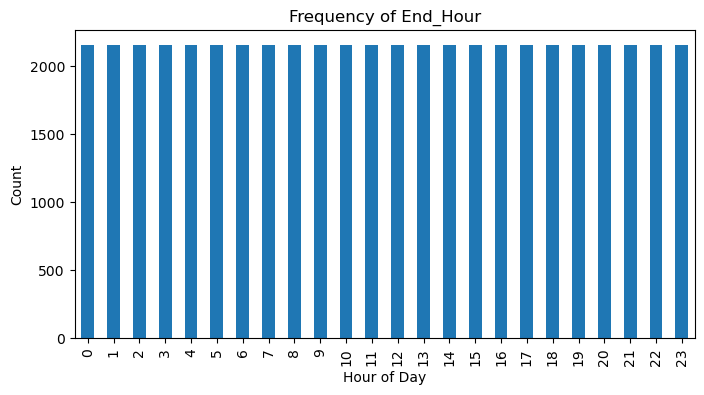

In [48]:
plt.figure(figsize=(8,4))
end_hour_freq.plot(kind="bar")
plt.title("Frequency of End_Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

The bar chart of End_Hour frequencies shows a nearly uniform distribution across all hours of the day. Each hour from 0 to 23 appears with approximately the same number of observations, indicating consistent temporal coverage and a regular hourly sampling structure. No missing or disproportionately represented ending hours are observed, suggesting the absence of temporal bias in the dataset

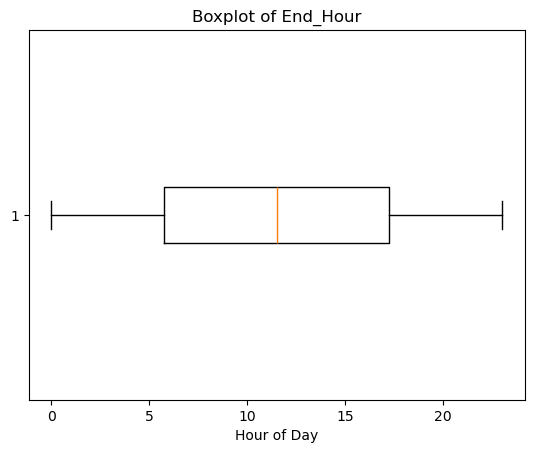

In [49]:
plt.figure()
plt.boxplot(df["End_Hour"].dropna(), vert=False)
plt.title("Boxplot of End_Hour")
plt.xlabel("Hour of Day")
plt.show()


The boxplot of End_Hour shows a symmetric distribution spanning the full 24-hour range, with the median located around midday. The interquartile range extends approximately from early morning to early evening, and no statistical outliers are detected. This reflects the uniform representation of all hours in the dataset and confirms that End_Hour is evenly distributed across the day rather than concentrated around specific time periods.

In [50]:
(df["End_Hour"] <= df["Start_Hour"]).sum()

np.int64(2161)

There is 2,161 rows where End_Hour is less than or equal to Start_Hour. In a normal same-day time interval, we expect End_Hour > Start_Hour. So 2,161 violations is not small. This tells us something structural about the data, as Overnight intervals, End_Hour == Start_Hour (no inteval) or data quality issues. So its necessary separate the cases do best understand the data issue.

In [51]:
overnight = df[df["End_Hour"] < df["Start_Hour"]]
equal_hours = df[df["End_Hour"] == df["Start_Hour"]]

len(overnight), len(equal_hours)


(2161, 0)

In [52]:
overnight[["Start_Hour", "End_Hour"]].head()

,Start_Hour,End_Hour
3,23,0
35,23,0
60,23,0
78,23,0
100,23,0


In [53]:
equal_hours[["Start_Hour", "End_Hour"]].head()

,Start_Hour,End_Hour


In [56]:
overnight.value_counts(["Start_Hour", "End_Hour"])

Start_Hour  End_Hour
23          0           2161
Name: count, dtype: int64

An analysis of Start_Hour and End_Hour revealed 2,161 intervals where the ending hour is earlier than the starting hour. Inspection of these records shows a consistent pattern in which intervals start at 23:00 and end at 00:00, indicating overnight measurement windows crossing midnight. No zero-length intervals were observed. These cases reflect valid temporal structure rather than data quality issues.

In [57]:
df["duration_hours"] = (df["End_Hour"] - df["Start_Hour"]) % 24
df["duration_hours"].value_counts()

duration_hours
1    51864
Name: count, dtype: int64

The computed duration between Start_Hour and End_Hour is equal to one hour for all 51,864 observations, indicating that the dataset has a fixed hourly temporal resolution

Production

In [59]:
df["Production"].dtype
df["Production"].head()

0    5281
1    3824
2    3824
3    6120
4    4387
Name: Production, dtype: int64

In [61]:
df["Production"].describe()

count    51864.000000
mean      6215.069933
std       3978.364965
min         58.000000
25%       3111.000000
50%       5372.000000
75%       8501.000000
max      23446.000000
Name: Production, dtype: float64

In [68]:
len(df)

51864

The Production variable contains 51,864 complete observations, indicating no missing values. The average hourly production is approximately 6,215 units, with a relatively high standard deviation of 3,978 units, reflecting substantial variability in production levels. The median production (5,372) is lower than the mean, suggesting a right-skewed distribution influenced by high production peaks. The interquartile range spans from 3,111 to 8,501 units, showing that half of the observations fall within this range. The maximum observed production (23,446) is considerably higher than the upper quartile, indicating the presence of extreme but plausible peak production events.

In [67]:
df["Production"].skew()

np.float64(0.9285606952955066)

The skewness of the Production variable is approximately 0.93, indicating a moderately right-skewed distribution. This suggests that while most observations cluster around lower to mid production values, a smaller number of high production peaks extend the right tail of the distribution. As a result, the mean production is influenced by these extreme values and exceeds the median.

In [62]:
df["Production"].isna().sum()

np.int64(0)

In [63]:
(df["Production"] == 0).sum()

np.int64(0)

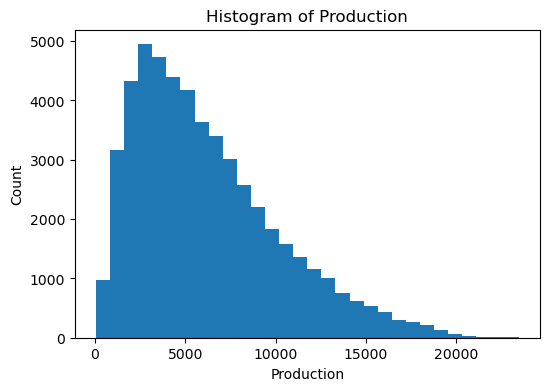

In [64]:
plt.figure(figsize=(6,4))
plt.hist(df["Production"].dropna(), bins=30)
plt.title("Histogram of Production")
plt.xlabel("Production")
plt.ylabel("Count")
plt.show()


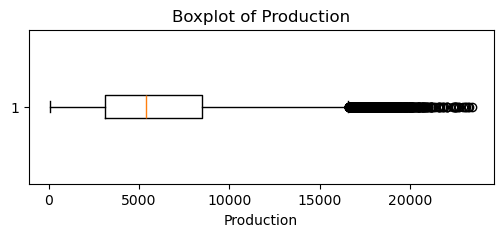

In [65]:
plt.figure(figsize=(6,2))
plt.boxplot(df["Production"].dropna(), vert=False)
plt.title("Boxplot of Production")
plt.xlabel("Production")
plt.show()

# Categorical 

In python, we can use:
- `value_counts()`
- `pd.crosstab()`

C:\Users\SuzanaSouza\AppData\Local\Temp\ipykernel_28028\2154191065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


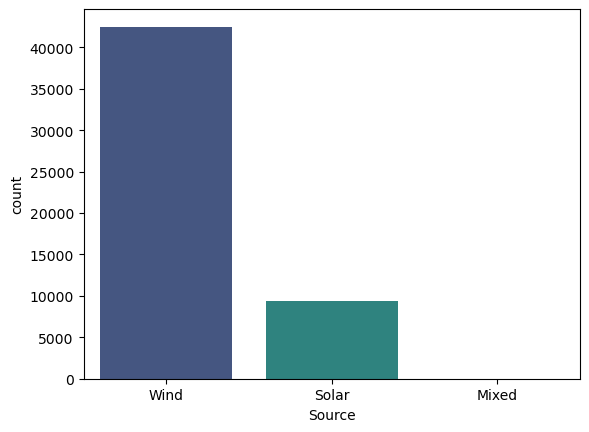

In [ ]:
sns.countplot(
    x="Source",
    data=cat,

    palette='viridis',
    legend=False,
)
plt.show()

In [ ]:
frequency_table = cat.Source.value_counts()

In [ ]:
proportion_table = cat.Source.value_counts(normalize=True).round(2)

In [ ]:
# merging absoluty frequency with relative frequenceies
df1 = pd.concat([frequency_table, proportion_table], axis=1)
df1.columns = ['absolute_frequency', 'relative_frequency']
df1

,absolute_frequency,relative_frequency
Source,,
Wind,42484,0.82
Solar,9378,0.18
Mixed,2,0.00
